In [11]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [12]:
# 2. Đọc file dữ liệu chứng khoán Eximbank và chia tập train test theo tỉ lệ 8:2
df = pd.read_csv('Eximbank.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Chia dữ liệu thành 2 tập train và test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [13]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm mô hình ARIMA phù hợp nhất bằng auto_arima 
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit mô hình
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15026.178, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15037.750, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15025.668, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15027.206, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15035.796, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15024.196, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15025.577, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15024.791, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15023.220, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15024.830, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15024.742, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=15021.169, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15025.239, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=15023.698, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [15]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán giá đóng cho 30 ngày tiếp theo
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# In ra giá đóng đã được dự đoán trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[15179.45573377 15129.52219984 15096.18032248 15073.91711179
 15059.05140568 15049.12519956 15042.4972219  15038.0715544
 15035.11642482 15033.14321043 15031.82564551 15030.94587426
 15030.35842885 15029.96617676 15029.70426017 15029.52937187
 15029.41259455 15029.3346194  15029.28255343 15029.24778766
 15029.22457369 15029.20907314 15029.19872303 15029.191812
 15029.18719733 15029.184116   15029.18205852 15029.18068468
 15029.17976734 15029.17915481]


In [16]:
# 6. Tính độ đo RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 3355.1129552467737


In [17]:
# 7. Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))*100
print('Testing MAPE:', test_mape)

Testing MAPE: 16.14118415013828


In [18]:
# 8. Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing MAE: 3009.9452519710894


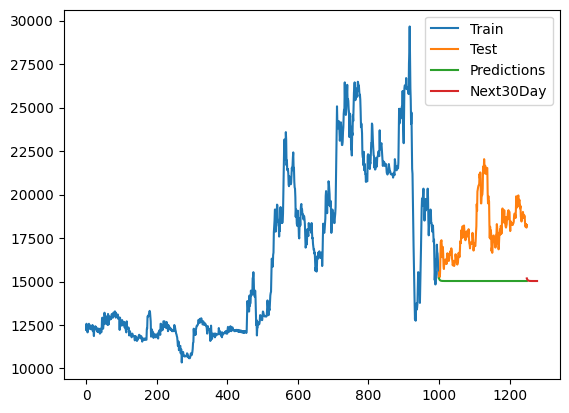

In [19]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

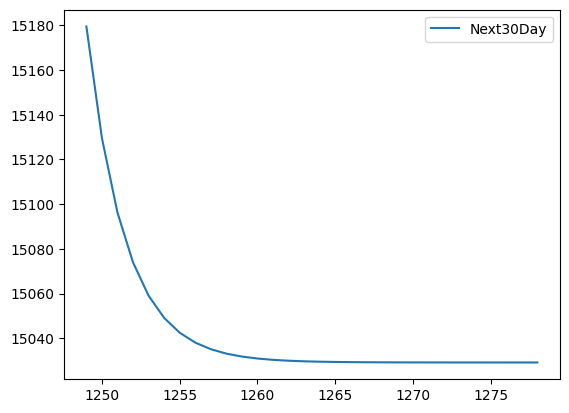

In [20]:
plt.plot(last_data,y_next_30_days)
plt.legend(['Next30Day'])
plt.show()